# Comparación de Ventanas
En este notebook compararemos diferentes tipos de ventanas utilizadas en procesamiento de señales:
- Ventana Rectangular
- Ventana Hamming
- Ventana Hanning
- Ventana Blackman

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Crear vector de tiempo
N = 100  # Número de puntos
n = np.arange(N)

# Definir las ventanas
rectangular = np.ones(N)
hamming = np.hamming(N)
hanning = np.hanning(N)
blackman = np.blackman(N)

## Gráfico de las Ventanas en el Dominio del Tiempo

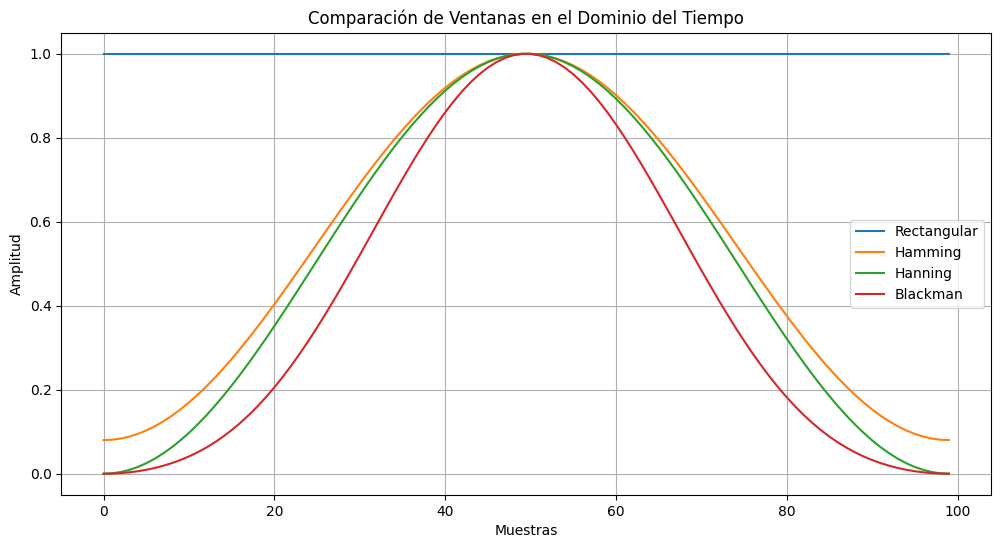

In [2]:
plt.figure(figsize=(12, 6))
plt.plot(n, rectangular, label='Rectangular')
plt.plot(n, hamming, label='Hamming')
plt.plot(n, hanning, label='Hanning')
plt.plot(n, blackman, label='Blackman')
plt.title('Comparación de Ventanas en el Dominio del Tiempo')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()
plt.show()

## Respuesta en Frecuencia de las Ventanas

/var/folders/w7/r5641d8n7kz9cv7lxz57cnn00000gn/T/ipykernel_31862/606611822.py:3: RuntimeWarning: divide by zero encountered in log10
  spectrum_db = 20 * np.log10(spectrum / spectrum.max())


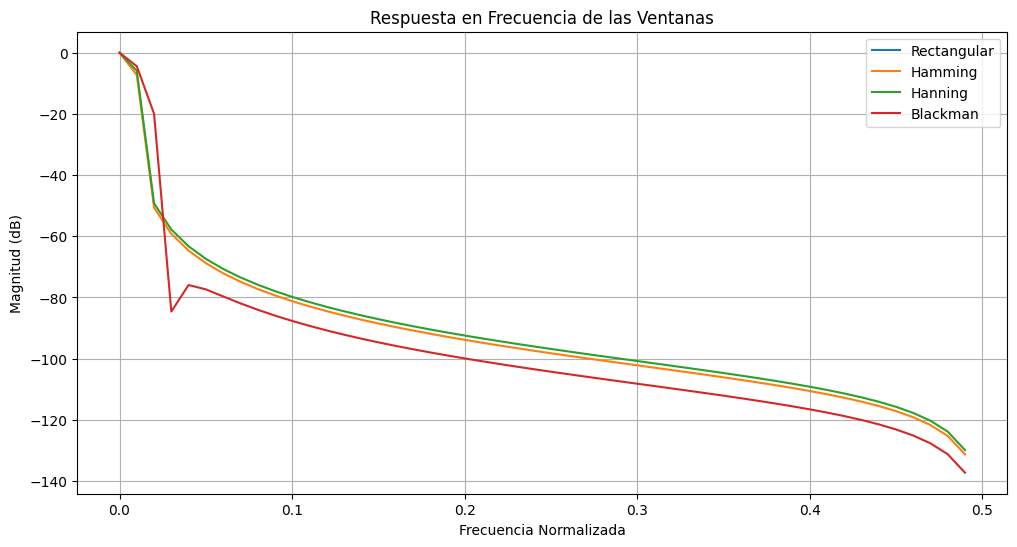

In [8]:
def plot_spectrum(window, name):
    spectrum = np.abs(np.fft.fft(window))
    spectrum_db = 20 * np.log10(spectrum / spectrum.max())
    freq = np.fft.fftfreq(len(window))
    return freq, spectrum_db

plt.figure(figsize=(12, 6))

# Calcular y graficar espectros
freq, rect_spec = plot_spectrum(rectangular, 'Rectangular')
_, hamm_spec = plot_spectrum(hamming, 'Hamming')
_, hann_spec = plot_spectrum(hanning, 'Hanning')
_, black_spec = plot_spectrum(blackman, 'Blackman')

plt.plot(freq[:N//2], rect_spec[:N//2], label='Rectangular')
plt.plot(freq[:N//2], hamm_spec[:N//2], label='Hamming')
plt.plot(freq[:N//2], hann_spec[:N//2], label='Hanning')
plt.plot(freq[:N//2], black_spec[:N//2], label='Blackman')

plt.title('Respuesta en Frecuencia de las Ventanas')
plt.xlabel('Frecuencia Normalizada')
plt.ylabel('Magnitud (dB)')
plt.grid(True)
plt.legend()
plt.show()

## Comparación de Características

/var/folders/w7/r5641d8n7kz9cv7lxz57cnn00000gn/T/ipykernel_31862/2937634230.py:4: RuntimeWarning: divide by zero encountered in log10
  spectrum_db = 20 * np.log10(spectrum / spectrum.max())


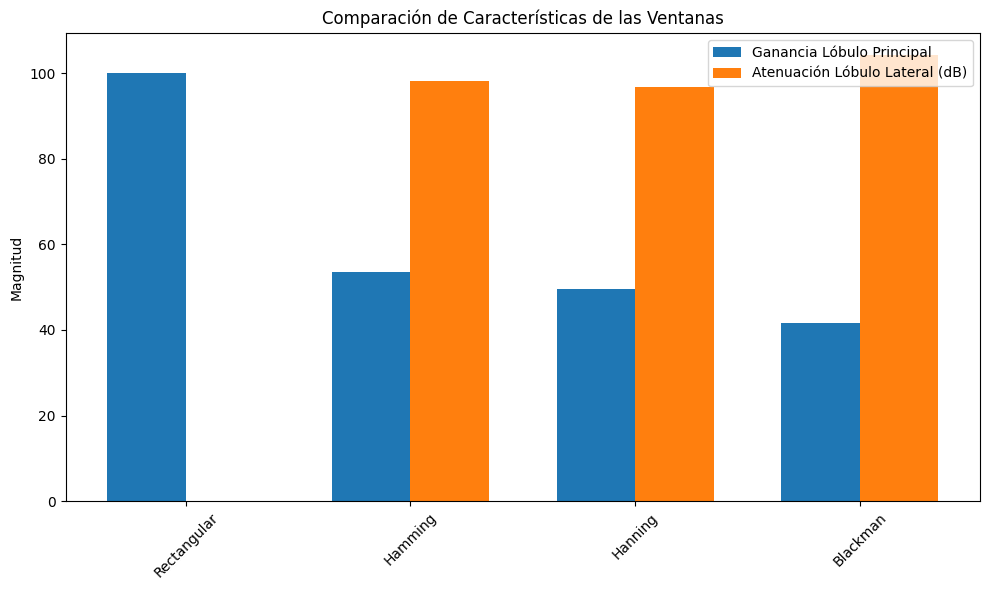

In [4]:
# Calcular características principales
def window_stats(window):
    spectrum = np.abs(np.fft.fft(window))
    spectrum_db = 20 * np.log10(spectrum / spectrum.max())

    # Lóbulo principal
    main_lobe = np.max(spectrum)

    # Atenuación del primer lóbulo lateral
    side_lobe = np.max(spectrum_db[N//4:3*N//4])

    return main_lobe, side_lobe

windows = {
    'Rectangular': rectangular,
    'Hamming': hamming,
    'Hanning': hanning,
    'Blackman': blackman
}

main_lobes = []
side_lobes = []
names = []

for name, window in windows.items():
    main_lobe, side_lobe = window_stats(window)
    main_lobes.append(main_lobe)
    side_lobes.append(side_lobe)
    names.append(name)

# Graficar comparación de características
x = np.arange(len(names))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, main_lobes, width, label='Ganancia Lóbulo Principal')
rects2 = ax.bar(x + width/2, np.abs(side_lobes), width, label='Atenuación Lóbulo Lateral (dB)')

ax.set_ylabel('Magnitud')
ax.set_title('Comparación de Características de las Ventanas')
ax.set_xticks(x)
ax.set_xticklabels(names)
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()